# Main Plotting of liftetime exposure for water scarcity DURATION 

Main script for plotting, does analysis based on script

In [4]:
import os
import xarray as xr
import pickle as pk
import time
import matplotlib as mpl
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from settings import *
from load_manip import *
from exposure import * 
from utils import *
from main_function import *
from maskplotting import *

# Script to plot countries
from plotting import *

# set own plotting parameters
set_plot_param()
map_proj = ccrs.Robinson(central_longitude=0, globe=None)

%matplotlib inline 

/apps/brussel/RL8/broadwell/software/Python/3.10.4-GCCcore-11.3.0/lib/python3.10/site-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [22]:
# extreme event
global flags

flags = {}
flags['extr'] = 'waterdeficitduration'   # 0: all
#flags['extr'] = 'waterdeficit'   # 0: all

                                  # 2: cropfailedarea
                                  # 3: waterscarcity
                                  # 4: falkenmark 
                                  # 5: water deficit
flags['mode'] = 'duration'   # whether to calculate exposure, duration, intensity or all. 
 

flags['runs'] = 0          # 0: do not process ISIMIP runs (i.e. load runs pickle)
                            # 1: process ISIMIP runs (i.e. produce and save runs as pickle)
flags['mask'] = 0           # 0: do not process country data (i.e. load masks pickle)
                            # 1: process country data (i.e. produce and save masks as pickle)
flags['exposure'] = 1     # 0: do not process ISIMIP runs to compute exposure (i.e. load exposure pickle)
                            # 1: process ISIMIP runs to compute exposure (i.e. produce and save exposure as pickle)
flags['exposure_pic'] = 0   # 0: do not process ISIMIP runs to compute picontrol exposure (i.e. load exposure pickle)
                            # 1: process ISIMIP runs to compute picontrol exposure (i.e. produce and save exposure as pickle)
flags['expectancy'] = 0     # 1: apply option of constant life expectancy

rcps = ['RCP60','RCP26']
rcp_text = {'RCP60': 'RCP 6.0', 'RCP26' : 'RCP 2.6'  }

labels = ['a.','b.','c.','d.','e.','f.','g.','h.','f.']
# TODO: add rest of flags

### Load and manipulate  files for plotting

In [23]:
# load country borders (from pickles)

d_countries = pk.load(open('./data/pickles/country_info.pkl', 'rb'))
df_countries = d_countries['info_pop']

# unpack country information
gdf_country_borders = d_countries['borders']
df_life_expectancy_5 = d_countries['life_expectancy_5']

# load cohort info
d_regions = pk.load(open('./data/pickles/region_info.pkl', 'rb'))

# unpack region information
df_birthyears_regions = d_regions['birth_years']
df_life_expectancy_5_regions = d_regions['life_expectancy_5']
d_cohort_weights_regions = d_regions['cohort_size']

# DURATION

In [ ]:
# plot per country the increase in months of average lifetime

variable='months_more2live'
df_months_moretolive = ((df_life_expectancy_5.loc[2020] - df_life_expectancy_5.loc[1960])*12).to_frame(name=variable)
bounds = np.array([0,25,50,75,100,125,150,175,200,225,250,275, 300])

legend_label = "number of months"

gdf_exposure_birthyear = gdf_country_borders.merge(df_months_moretolive, left_index=True, right_index=True)

fig, ax = plt.subplots(figsize=(18,10), subplot_kw={'projection':map_proj})
ax.axis('off')
cax = ax.inset_axes((1.02, 0.1, 0.03, 0.9)); #make a color bar axis
ax.coastlines(color='lightgray',linewidth=0.5)
ax.add_feature(cfeature.BORDERS,color='white',linewidth=0.5)
gdf_exposure_birthyear.plot(ax=ax, column=variable, cax=cax, legend = True,  cmap='BuPu', legend_kwds={'label': legend_label}, transform=ccrs.PlateCarree(), norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256))
ax.set_title('Increase in life expectancy (2020 birth cohort - 1960 birth cohort)', loc='right'); 

In [24]:
ds_duration, ds_duration_perregion, d_duration_rcp26runs, d_duration_rcp60runs = calc_lifetime_deficit_duration(flags)

Loading processed country and region data
Loading processed isimip data
simulation 1 of 32
processing country 177 of 177
processing region 12 of 12
simulation 2 of 32
processing country 177 of 177
processing region 12 of 12
simulation 3 of 32
processing country 177 of 177
processing region 12 of 12
simulation 4 of 32
processing country 177 of 177
processing region 12 of 12
simulation 5 of 32
processing country 177 of 177
processing region 12 of 12
simulation 6 of 32
processing country 177 of 177
processing region 12 of 12
simulation 7 of 32
processing country 177 of 177
processing region 12 of 12
simulation 8 of 32
processing country 177 of 177
processing region 12 of 12
simulation 9 of 32
processing country 177 of 177
processing region 12 of 12
simulation 10 of 32
processing country 177 of 177
processing region 12 of 12
simulation 11 of 32
processing country 177 of 177
processing region 12 of 12
simulation 12 of 32
processing country 177 of 177
processing region 12 of 12
simulation 13

UnboundLocalError: local variable 'd_exposure_perrun_RCP' referenced before assignment

In [ ]:
phase, ages, age_young, age_ref, age_range, year_ref, year_start, birth_years, year_end, year_range, RCP2GMT_maxdiff_threshold, year_start_GMT_ref, year_end_GMT_ref, model_names = init()

# set extremes based on flag (this needs to happen here as it uses the flags dict defined above)
extremes = set_extremes(flags)

# set modes based on flag 
modes = set_modes(flags)


# Load global mean temperature projections
global df_GMT_15, df_GMT_20, df_GMT_NDC

df_GMT_15, df_GMT_20, df_GMT_NDC = load_GMT(
    year_start,
    year_end,
) 

d_isimip_meta, d_pic_meta = load_isimip(
phase,
flags['runs'], 
flags['exposure_pic'],
extremes, 
modes,
model_names,
df_GMT_15,
df_GMT_20,
df_GMT_NDC,
year_end_GMT_ref, 
year_start_GMT_ref, 
year_end, 
year_start, 
RCP2GMT_maxdiff_threshold)


In [ ]:
d_countries = pk.load(open('./data/pickles/country_info.pkl', 'rb'))

# unpack country information
df_countries = d_countries['info_pop']
gdf_country_borders = d_countries['borders']
da_population = d_countries['population_map']
df_birthyears = d_countries['birth_years']
df_life_expectancy_5 = d_countries['life_expectancy_5']
d_cohort_size = d_countries['cohort_size']
d_all_cohorts = d_countries['all_cohorts']
countries_regions, countries_mask = d_countries['mask']

d_duration_perrun_RCP     = {}
d_duration_perregion_perrun_RCP = {}
d_landfrac_peryear_perregion = {}
da_exposure_cohort = {}


# unpack region information
df_birthyears_regions = d_regions['birth_years']
d_cohort_weights_regions = d_regions['cohort_size']    
da_cohort_size = xr.DataArray(
    # np.asarray(list(d_cohort_size.values())),
    np.asarray([v for k,v in d_all_cohorts.items() if k in list(df_countries['name'])]),
    coords={
        'country': ('country', list(df_countries['name'])),
        'time': ('time', year_range),
        'ages': ('ages', np.arange(104,-1,-1)),
    },
    dims=[
        'country',
        'time',
        'ages',
    ]
) 


In [ ]:
d_duration_percountry = {}
d_nmonths_percountry = {}
d_nevents_percountry = {}

d_nmonths_perrun_RCP = {}
d_nevents_perrun_RCP = {}
# loop over simulations
for i in [14]: 

    print('simulation '+str(i)+ ' of '+str(len(d_isimip_meta)))

    # load AFA data of that run
    with open('./data/pickles/isimip_AFA_{}_{}_{}.pkl'.format(d_isimip_meta[i]['extreme'],d_isimip_meta[i]['mode'],str(i)), 'rb') as f:
        da_AFA = pk.load(f)

    # --------------------------------------------------------------------
    # apply dryland mask --- OLD with dryland mask based on ISIMIP

    #if modes=='dryland': 
        # load dryland mask related to simulation
    #     dryland_mask = load_drylandmask(year_start, year_end, d_isimip_meta[i]['model'], d_isimip_meta[i]['gcm'], d_isimip_meta[i]['rcp'])
    #     da_population = da_population.where(dryland_mask).fillna(0)

    # --------------------------------------------------------------------
    # per country 

    # initialise dicts
    d_exposure_peryear_percountry = {}

    # get spatial average
    for j, country in enumerate(['Belgium']):#df_countries['name']):

        print('processing country '+str(j+1)+' of '+str(len(df_countries)), end='\r')

        # calculate mean per country weighted by population
        ind_country = countries_regions.map_keys(country)

        # calculate per country and birthyear the mean duration of events. 
        da_nevents_country = da_AFA['nevents'].where(countries_mask == ind_country, drop=True)
        da_nmonths_country = da_AFA['nmonths'].where(countries_mask == ind_country, drop=True)


        # initialise birth years 
        list_da_duration_birthyears_percountry = []
        list_da_nmonths_birthyears_percountry = []
        list_da_nevents_birthyears_percountry = []

        d_duration_perbirthyear = {} 
        d_nmonths_perbirthyear = {} 
        d_nevents_perbirthyear = {} 

        for birth_year in df_life_expectancy_5.index:

            df_life_expectancy = df_life_expectancy_5.loc[birth_year,country] 

            # define death year based on life expectancy
            death_year = birth_year + np.floor(df_life_expectancy)

            # integrate exposure over full years lived
            nevents_birthyears_percountry = da_nevents_country.sel(time=slice(birth_year,death_year)).sum('time')
            nmonths_birthyears_percountry = da_nmonths_country.sel(time=slice(birth_year,death_year)).sum('time')
            duration_birthyears_percountry = nmonths_birthyears_percountry / nevents_birthyears_percountry
            # correct for gridcells where there is no event (nevents == 0, which lead to infinite durations 
            duration_birthyears_percountry = duration_birthyears_percountry.where(duration_birthyears_percountry!=np.inf,  np.nan)
            list_da_duration_birthyears_percountry.append(duration_birthyears_percountry)
            list_da_nmonths_birthyears_percountry.append(nmonths_birthyears_percountry)
            list_da_nevents_birthyears_percountry.append(nevents_birthyears_percountry)

            # historical + RCP simulations
            da_duration = calc_weighted_fldmean( 
                duration_birthyears_percountry,
                da_population.where(duration_birthyears_percountry, drop=True).sel(time=2020).squeeze().drop('time'), 
                countries_mask, 
                ind_country, 
                flag_region= False)
            da_nmonths = calc_weighted_fldmean( 
                nmonths_birthyears_percountry,
                da_population.where(nmonths_birthyears_percountry, drop=True).sel(time=2020).fillna(0).squeeze().drop('time'), 
                countries_mask, 
                ind_country, 
                flag_region= False)
            da_nevents = calc_weighted_fldmean( 
                nevents_birthyears_percountry,
                da_population.where(nevents_birthyears_percountry, drop=True).sel(time=2020).fillna(0).squeeze().drop('time'), 
                countries_mask, 
                ind_country, 
                flag_region= False)

            d_duration_perbirthyear[birth_year] = float(da_duration.values)
            d_nmonths_perbirthyear[birth_year] = float(da_nmonths.values)
            d_nevents_perbirthyear[birth_year] = float(da_nevents.values)

        d_duration_percountry[country] = d_duration_perbirthyear
        d_nmonths_percountry[country] = d_nmonths_perbirthyear
        d_nevents_percountry[country] = d_nevents_perbirthyear

    df_duration_birthyears_percountry = pd.DataFrame.from_dict(d_duration_percountry,orient='index')
    df_nmonths_birthyears_percountry = pd.DataFrame.from_dict(d_nmonths_percountry,orient='index')
    df_nevents_birthyears_percountry = pd.DataFrame.from_dict(d_nevents_percountry,orient='index')

    d_duration_perrun_RCP[i] = df_duration_birthyears_percountry.transpose()
    d_nmonths_perrun_RCP[i] = df_nmonths_birthyears_percountry.transpose()
    d_nevents_perrun_RCP[i] = df_nevents_birthyears_percountry.transpose()




In [ ]:
d_isimip_meta[14]

In [ ]:
d_nmonths_perrun_RCP = {}
d_nevents_perrun_RCP = {}

d_nmonths_perrun_RCP[i] = nmonths_birthyears_percountry.transpose()
d_nevents_perrun_RCP[i] = nevents_birthyears_percountry.transpose()

In [ ]:
country = 'Belgium'
d_duration_perrun_RCP[14].loc[:,country].plot()

In [ ]:
d_nmonths_perrun_RCP[i].loc[:,country].plot()

In [ ]:
country = 'Zimbabwe'
d_nevents_perrun_RCP[i].loc[:,country].plot()

In [ ]:
country= 'Zimbabwe'

In [ ]:
duration_birthyears_percountry.plot()

In [ ]:
list_da_duration_birthyears_percountry[2006-1960].plot()

In [17]:
list_da_duration_birthyears_percountry[2007-1960]

<xarray.DataArray (lat: 4, lon: 6)>
array([[ 65.64285714,   1.02272727,   1.32394366,  16.13461538,
         10.47368421,          nan],
       [116.5       ,   1.        ,  16.68085106,          nan,
          1.        ,          nan],
       [         nan,          nan,  17.2       ,          nan,
          1.        ,          nan],
       [         nan,          nan,          nan,          nan,
                 nan,          nan]])
Coordinates:
  * lat      (lat) float64 51.25 50.75 50.25 49.75
  * lon      (lon) float64 3.25 3.75 4.25 4.75 5.25 5.75

In [18]:
list_da_duration_birthyears_percountry[2006-1960].sel(lat=50.75, lon=4.75)

<xarray.DataArray ()>
array(948.)
Coordinates:
    lat      float64 50.75
    lon      float64 4.75

In [19]:
list_da_nevents_birthyears_percountry[2007-1960].sel(lat=50.75, lon=4.75)

<xarray.DataArray 'nevents' ()>
array(0.)
Coordinates:
    lat      float64 50.75
    lon      float64 4.75

In [20]:
list_da_nmonths_birthyears_percountry[2006-1960].sel(lat=50.75, lon=4.75)

<xarray.DataArray 'nmonths' ()>
array(948.)
Coordinates:
    lat      float64 50.75
    lon      float64 4.75

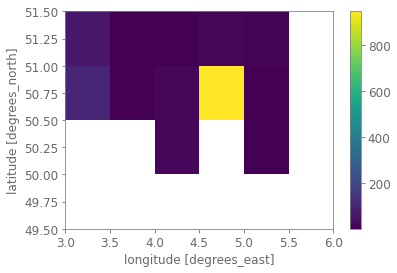

In [21]:
(list_da_nmonths_birthyears_percountry[2006-1960]/list_da_nevents_birthyears_percountry[2006-1960]).plot()

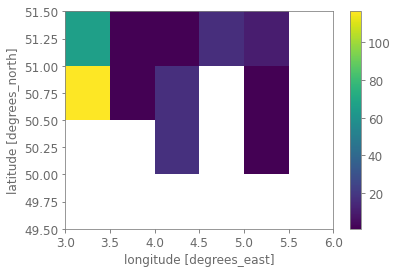

In [22]:
(list_da_nmonths_birthyears_percountry[2007-1960]/list_da_nevents_birthyears_percountry[2007-1960]).plot()

In [23]:
.plot()

SyntaxError: invalid syntax (326299263.py, line 1)

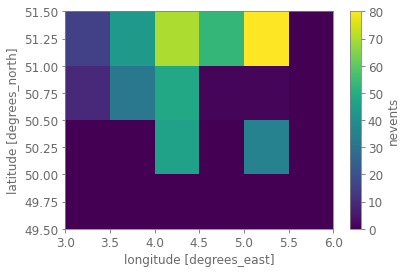

In [24]:
list_da_nevents_birthyears_percountry[2006-1960].plot()

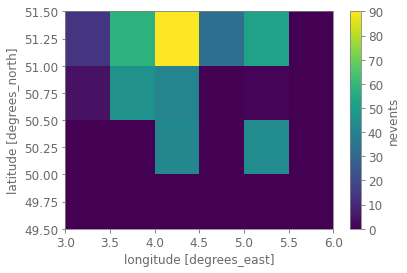

In [25]:
nevents_birthyears_percountry.plot()

In [26]:
d_duration_perrun_RCP[14].loc[:,'France'].plot()

KeyError: 'France'

In [ ]:
d_isimip_meta[10]

In [ ]:
d_isimip_meta[16]['model']

In [ ]:
 ds_duration, ds_duration_perregion, d_duration_allruns = do_lifetime_analysis(flags)

In [ ]:
d_exposure = d_duration_rcp60runs

da_perrun_RCP = xr.concat([xr.DataArray(v).rename({'dim_0':'birth_year','dim_1':'country'}) for v in d_exposure.values()],
dim='runs',).assign_coords({'runs':list(d_exposure.keys())})

In [ ]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

cmap = plt.cm.Blues
c1 = cmap(np.arange(1,9)*15)
cmap = plt.cm.Greens
c2 =  cmap(np.arange(1,9)*15)
cmap = plt.cm.Oranges
c3 =  cmap(np.arange(1,9)*15)
cmap = plt.cm.Purples
c4 = cmap(np.arange(1,9)*15)

colors = np.concatenate((c1,c2,c3,c4))


In [ ]:
country = 'France'

fig,ax = plt.subplots()
for i in da_perrun_RCP.runs.values:
    da_perrun_RCP.sel(country=country).sel(runs=i).plot(ax=ax, color=colors[i-1,:], label=i, linewidth=3)
ax.set_ylabel('water deficit (%)')
ax.set_title(' ')
ax.set_title(country, loc='right');
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [27]:
    # loop over simulations
    for i in list(d_isimip_meta.keys()): 

        print('simulation '+str(i)+ ' of '+str(len(d_isimip_meta)))

        # load AFA data of that run
        with open('./data/pickles/isimip_AFA_{}_{}_{}.pkl'.format(d_isimip_meta[i]['extreme'],d_isimip_meta[i]['mode'],str(i)), 'rb') as f:
            da_AFA = pk.load(f)

        # --------------------------------------------------------------------
        # apply dryland mask --- OLD with dryland mask based on ISIMIP

        #if modes=='dryland': 
            # load dryland mask related to simulation
        #     dryland_mask = load_drylandmask(year_start, year_end, d_isimip_meta[i]['model'], d_isimip_meta[i]['gcm'], d_isimip_meta[i]['rcp'])
        #     da_population = da_population.where(dryland_mask).fillna(0)

        # --------------------------------------------------------------------
        # per country 

        # initialise dicts
        d_exposure_peryear_percountry = {}

        # get spatial average
        for j, country in enumerate(df_countries['name']):

            print('processing country '+str(j+1)+' of '+str(len(df_countries)), end='\r')

            # calculate mean per country weighted by population
            ind_country = countries_regions.map_keys(country)

            # calculate per country and birthyear the mean duration of events. 
            da_nevents_country = da_AFA['nevents'].where(countries_mask == ind_country, drop=True)
            da_nmonths_country = da_AFA['nmonths'].where(countries_mask == ind_country, drop=True)


            # initialise birth years 
            list_da_duration_birthyears_percountry = []
            list_da_nmonths_birthyears_percountry = []

            d_duration_perbirthyear = {} 
            for birth_year in df_life_expectancy_5.index:

                df_life_expectancy = df_life_expectancy_5.loc[birth_year,country] 

                # define death year based on life expectancy
                death_year = birth_year + np.floor(df_life_expectancy)

                # integrate exposure over full years lived
                nevents_birthyears_percountry = da_nevents_country.sel(time=slice(birth_year,death_year)).sum('time')
                nmonths_birthyears_percountry = da_nmonths_country.sel(time=slice(birth_year,death_year)).sum('time')
                duration_birthyears_percountry = nmonths_birthyears_percountry / nevents_birthyears_percountry
                # correct for gridcells where there is no event (nevents == 0, which lead to infinite durations 
                duration_birthyears_percountry = duration_birthyears_percountry.where(duration_birthyears_percountry!=np.inf,  np.nan)
                list_da_duration_birthyears_percountry.append(duration_birthyears_percountry)

                # historical + RCP simulations
                da_duration = calc_weighted_fldmean( 
                    duration_birthyears_percountry,
                    da_population.where(duration_birthyears_percountry, drop=True).sel(time=2020).squeeze().drop('time'), 
                    countries_mask, 
                    ind_country, 
                    flag_region= False)

                d_duration_perbirthyear[birth_year] = float(da_duration.values)
            d_duration_percountry[country] = d_duration_perbirthyear

        duration_birthyears_percountry = pd.DataFrame.from_dict(d_duration_percountry,orient='index')

        d_duration_perrun_RCP[i] = duration_birthyears_percountry.transpose()



simulation 1 of 32
simulation 2 of 32 177 of 177
simulation 3 of 32 177 of 177


KeyboardInterrupt: 

In [ ]:
flags['mode'] = 'events'   # whether to calculate exposure, duration, intensity or all. 

ds_events, ds_events_perregion, d_events_rcp26runs, d_events_rcp60runs = calc_lifetime_deficit_duration(flags)

In [ ]:
d_exposure = d_events_rcp60runs

da_perrun_RCP = xr.concat([xr.DataArray(v).rename({'dim_0':'birth_year','dim_1':'country'}) for v in d_exposure.values()],
dim='runs',).assign_coords({'runs':list(d_exposure.keys())})

In [ ]:
country = 'Belgium'

fig,ax = plt.subplots()
for i in da_perrun_RCP.runs.values:
    da_perrun_RCP.sel(country=country).sel(runs=i).plot(ax=ax,  label=i, linewidth=3)
ax.set_ylabel('water deficit (%)')
ax.set_title(' ')
ax.set_title(country, loc='right');
ax.legend()

In [ ]:
flags['mode'] = 'frequency'   # whether to calculate exposure, duration, intensity or all. 

ds_frequency, ds_frequency_perregion, d_frequency_rcp26runs, d_frequency_rcp60runs = calc_lifetime_deficit_duration(flags)

In [ ]:
d_exposure = d_frequency_rcp60runs

da_perrun_RCP_freq = xr.concat([xr.DataArray(v).rename({'dim_0':'birth_year','dim_1':'country'}) for v in d_exposure.values()],
dim='runs',).assign_coords({'runs':list(d_exposure.keys())})

In [ ]:
country = 'Belgium'

fig,ax = plt.subplots()
for i in da_perrun_RCP.runs.values:
    da_perrun_RCP_freq.sel(country=country).sel(runs=i).plot(ax=ax, label=i, linewidth=3)
ax.set_ylabel('water deficit (%)')
ax.set_title(' ')
ax.set_title(country, loc='right');
ax.legend()

In [ ]:

fig,ax = plt.subplots()
for i in da_perrun_RCP.runs.values:

    (da_perrun_RCP_freq/da_perrun_RCP).sel(country=country).sel(runs=i).plot(ax=ax, color=colors[i-1,:], label=i, linewidth=3)
    ax.set_ylabel('water deficit (%)')
    ax.set_title(' ')
    ax.set_title(country, loc='right');
    ax.legend()

In [ ]:
rcp = rcps[0]

variable = 'mmm_'+rcp
da = ds_events[variable]


# select birth years and merge with gpd countries
birth_year = 2006
bounds = np.array([0,2,4,6,8,10,12,24,48,100,140,180,220])

legend_label = "number of months"
df_2 = da.sel({'birth_year' : birth_year}).to_dataframe()


gdf_exposure_birthyear = gdf_country_borders.merge(df_2, left_index=True, right_on='country')

fig, ax = plt.subplots(figsize=(18,10), subplot_kw={'projection':map_proj})
ax.axis('off')
cax = ax.inset_axes((1.02, 0.1, 0.03, 0.9)); #make a color bar axis
ax.coastlines(color='lightgray',linewidth=0.5)
ax.add_feature(cfeature.BORDERS,color='white',linewidth=0.5)
gdf_exposure_birthyear.plot(ax=ax, column=variable, cax=cax, legend = True,  cmap='OrRd', legend_kwds={'label': legend_label}, transform=ccrs.PlateCarree())
ax.set_title('Average duration of water deficit event during lifetime for person born in '+str(birth_year)+' ('+rcp_text[rcp]+')', loc='right'); 

In [ ]:
rcp = rcps[0]

variable = 'mmm_'+rcp
da = ds_duration[variable]


# select birth years and merge with gpd countries
birth_year = 2020
bounds = np.array([0,2,4,6,8,10,12,24,48,100,140,180,220])
#bounds = np.arange(0,220,20)

legend_label = "number of months"
df_2 = da.sel({'birth_year' : birth_year}).to_dataframe()


gdf_exposure_birthyear = gdf_country_borders.merge(df_2, left_index=True, right_on='country')

fig, ax = plt.subplots(figsize=(18,10), subplot_kw={'projection':map_proj})
ax.axis('off')
cax = ax.inset_axes((1.02, 0.1, 0.03, 0.9)); #make a color bar axis
ax.coastlines(color='lightgray',linewidth=0.5)
ax.add_feature(cfeature.BORDERS,color='white',linewidth=0.5)
gdf_exposure_birthyear.plot(ax=ax, column=variable, cax=cax, legend = True,  cmap='OrRd', legend_kwds={'label': legend_label}, transform=ccrs.PlateCarree(), norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256))
ax.set_title('Average duration of water deficit event during lifetime for person born in '+str(birth_year)+' ('+rcp_text[rcp]+')', loc='right'); 

In [ ]:
variable = 'mmm_'+rcp
da = ds_duration[variable]


# select birth years and merge with gpd countries
birth_year = 1960
bounds = np.array([0,2,4,6,8,10,12,24,48,100,140,180,220])

legend_label = "number of months"
df = da.sel({'birth_year' : birth_year}).to_dataframe()


gdf_exposure_birthyear = gdf_country_borders.merge(df, left_index=True, right_on='country')

fig, ax = plt.subplots(figsize=(18,10), subplot_kw={'projection':map_proj})
ax.axis('off')
cax = ax.inset_axes((1.02, 0.1, 0.03, 0.9)); #make a color bar axis
ax.coastlines(color='lightgray',linewidth=0.5)
ax.add_feature(cfeature.BORDERS,color='white',linewidth=0.5)
gdf_exposure_birthyear.plot(ax=ax, column=variable, cax=cax, legend = True,  cmap='OrRd', legend_kwds={'label': legend_label}, vmax=100, transform=ccrs.PlateCarree(), norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256))
ax.set_title('Average duration of water deficit event during lifetime for person born in '+str(birth_year)+' ('+rcp_text[rcp]+')', loc='right'); 

In [ ]:
rcp = rcps[0]

variable = 'mmm_'+rcp
da = ds_duration[variable]

# select birth years and merge with gpd countries
birth_year = 2020
df_2 = da.sel({'birth_year' : birth_year}).to_dataframe()
birth_year = 1960
df = da.sel({'birth_year' : birth_year}).to_dataframe()



d_waterdeficit = (df_2-df)
legend_label = "$\Delta$ number of months"
gdf_emf = gdf_country_borders.merge(d_waterdeficit, left_index=True, right_on='country')
#bounds = np.array([-150,-100, -48, -24, -12, -10,-8,-6,-4 ,-2,0,2,4,6,8,10,12,24,48,100,150])
bounds = np.array([-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,10,20,30,40,50,60,70,80,90,100])
bounds = np.array([-120,-96,-72,-48,-24,-12,-6,-3,3,6,12,24,48,72,96,120])
ticks = np.array ([-120,    -72,    -24,    -6,     6,   24,   72,   120])
ticklabels = ['-10 years', '-6 years','-2 years','-0.5 years', '0.5 years', '2 years','6 years','10 years']
fig, ax = plt.subplots(figsize=(18,10), subplot_kw={'projection':map_proj})
ax.axis('off')
ax.coastlines(color='lightgray',linewidth=0.5)
ax.add_feature(cfeature.BORDERS,color='lightgray',linewidth=0.5)

cax = ax.inset_axes((1.02, 0.1, 0.03, 0.9)); #make a color bar axis

gdf_emf.plot(ax=ax, column=variable, legend = True,  cmap='BrBG_r',  cax=cax, legend_kwds={'label': legend_label},  transform=ccrs.PlateCarree(), norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both'))
ax.set_title('$\Delta$ Average duration of water deficit event (2020-1960) '+rcp_text[rcp],  loc='right');
cax.set_yticks(ticks)

#cax.set_yticklabels(ticklabels)


In [23]:
rcps[0]

'RCP60'

/apps/brussel/RL8/broadwell/software/Cartopy/0.20.3-foss-2022a/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


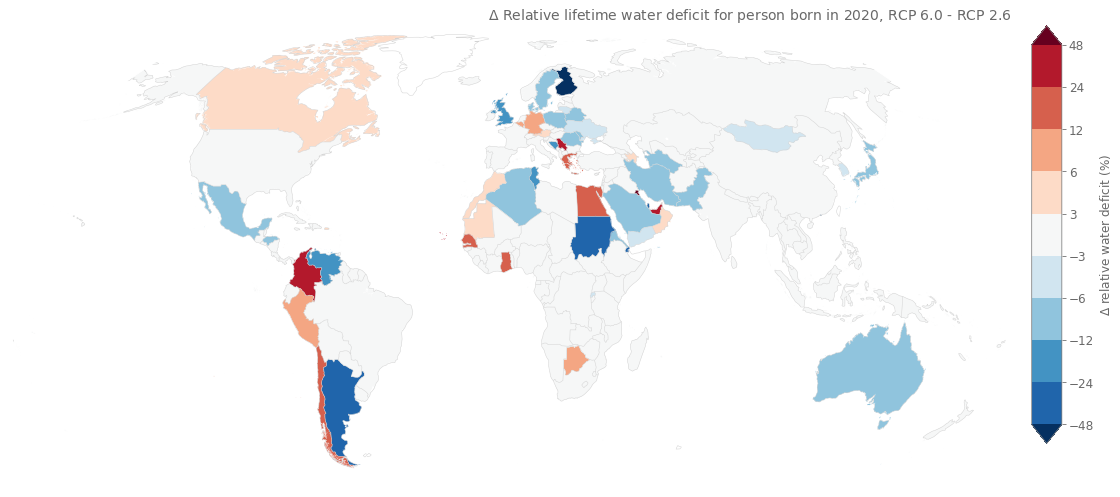

In [24]:
variable = 'delta_60_26'

d_waterdeficit_60= ds_duration['mmm_'+rcps[0]].sel({'birth_year' : 2020}).to_dataframe()
d_waterdeficit_26= ds_duration['mmm_'+rcps[1]].sel({'birth_year' : 2020}).to_dataframe()

d_waterdeficit_60_26 = (d_waterdeficit_60['mmm_'+rcps[0]] - d_waterdeficit_26['mmm_'+rcps[1]]).rename(variable)


legend_label = '$\Delta$ relative water deficit (%)'
gdf_emf = gdf_country_borders.merge(d_waterdeficit_60_26, left_index=True, right_on='country')
#bounds = np.array([-15,-12.5,-10,-7.5,-5,-2.5,0,2.5,5,7.5,10,12.5,15])
bounds = np.array([-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30])
bounds = np.array([-48,-24,-12,-6,-3,3,6,12,24,48])




fig, ax = plt.subplots(figsize=(18,10), subplot_kw={'projection':map_proj})
ax.axis('off')
ax.coastlines(color='lightgray',linewidth=0.5)
ax.add_feature(cfeature.BORDERS,color='lightgray',linewidth=0.5)

cax = ax.inset_axes((1.02, 0.1, 0.03, 0.9)); #make a color bar axis

gdf_emf.plot(ax=ax, column=variable, legend = True,  cmap='RdBu_r',  cax=cax, legend_kwds={'label': legend_label}, transform=ccrs.PlateCarree(), norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both'))
ax.set_title('$\Delta$ Relative lifetime water deficit for person born in 2020, RCP 6.0 - RCP 2.6',  loc='right');

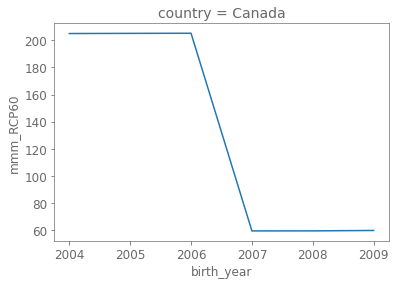

In [29]:
ds_duration['mmm_'+rcps[0]].sel(country='Canada').sel({'birth_year':range(2004,2010)}).plot()

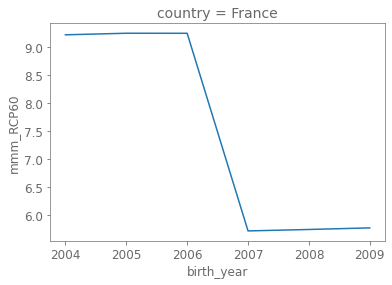

In [30]:
ds_duration['mmm_'+rcps[0]].sel(country='France').sel({'birth_year':range(2004,2010)}).plot()

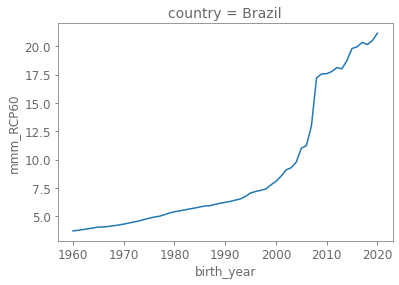

In [31]:
ds_duration['mmm_'+rcps[0]].sel(country='Brazil').plot()

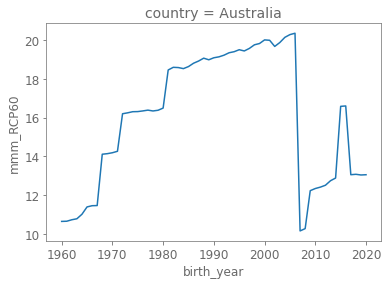

In [32]:
ds_duration['mmm_'+rcps[0]].sel(country='Australia').plot()

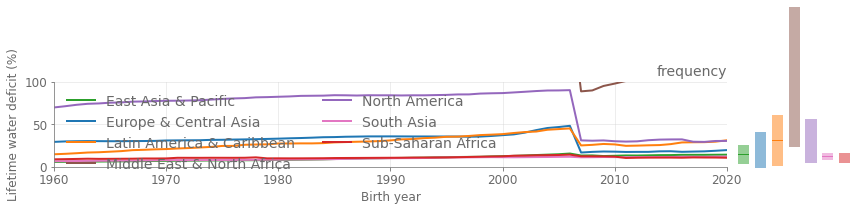

In [33]:
plot_lineplot(ds_duration_perregion, flags['mode'])

In [34]:
get_globalnumbers(ds_duration_perregion, flags['mode'])

Global mean lifetime water deficit (%)
 
birthyear 1960: 20.66 %
birthyear 2020: 21.53 %
 
RCP 2.6: 22.68 %
RCP 6.0: 21.53 %


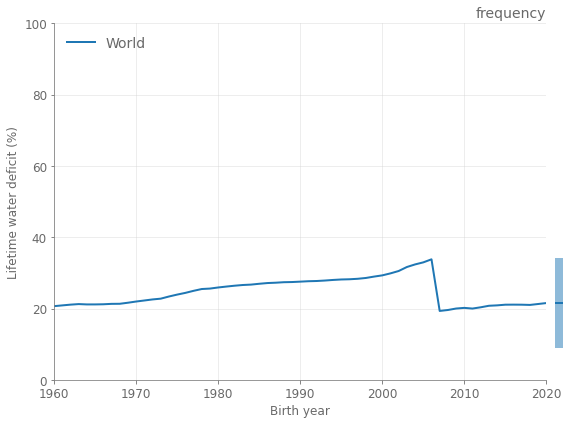

In [35]:
plot_lineplot_globalmean(ds_duration_perregion, flags['mode'])

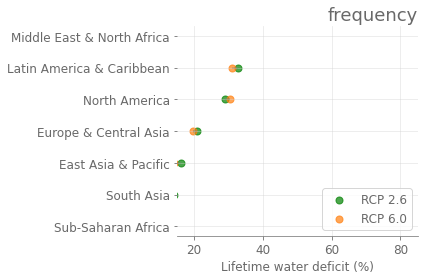

In [36]:
plot_lollipop(ds_duration_perregion, flags['mode'])

In [37]:
plot_generation_map(ds_duration_perregion, flags['mode'])

KeyError: 'country'

In [38]:
plot_mitigation_map(ds_duration_perregion, flags['mode'])

KeyError: 'country'

In [ ]:
plot_barplots( flags['mode'], ds_duration_perregion)